<a href="https://colab.research.google.com/github/mfathul21/travel-insurance/blob/main/Proyek_Pertama_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Travel Insurance Prediction Data


## Domain Proyek

### Latar belakang

Industri pariwisata dan perjalanan telah mengalami perubahan yang signifikan akibat pandemi Covid-19. Selain mengganggu perjalanan global, pandemi ini juga meningkatkan kesadaran akan perlunya perlindungan tambahan seperti asuransi perjalanan. Di tengah perubahan ini, perusahaan-perusahaan tur dan perjalanan perlu memahami preferensi pelanggan mereka terkait asuransi perjalanan, termasuk perlindungan Covid-19.

### Mengapa Masalah Ini Harus Diselesaikan?
- Dengan memahami preferensi pelanggan terkait asuransi perjalanan, perusahaan dapat mengoptimalkan strategi pemasaran dan penjualan mereka. Ini dapat meningkatkan konversi penjualan dan pendapatan keseluruhan.
- Dalam konteks pandemi, keamanan dan perlindungan menjadi prioritas utama bagi pelanggan. Penawaran paket asuransi perjalanan yang mencakup perlindungan Covid-19 dapat meningkatkan rasa aman pelanggan dan mendorong mereka untuk melakukan perjalanan.

### Bagaimana Masalah Ini Harus Diselesaikan?
- Perusahaan perlu melakukan analisis data menyeluruh terkait preferensi dan perilaku pembelian pelanggan mereka terkait asuransi perjalanan.
- Dengan menggunakan teknik machine learning dan predictive analytics, perusahaan dapat membangun model cerdas yang dapat memprediksi minat pelanggan dalam membeli asuransi perjalanan.

## Business Understanding

Berdasarkan kondisi yang telah diuraikan sebelumnya, perusahaan akan mengembangkan sebuah sistem prediksi minat pelanggan untuk menjawab permasalahan berikut.

- Dari serangkaian fitur yang ada, fitur apa yang paling berpengaruh terhadap pelanggan yang berminat untuk membeli paket asuransi perjalanan?
- Apakah pelanggan akan berminat untuk membeli paket asuransi perjalanan berdasarkan fitur tertentu?


Untuk menjawab pertanyaan tersebut, Anda akan membuat predictive modelling dengan tujuan atau goals sebagai berikut:

- Mengetahui fitur yang paling berkorelasi dengan minat pelanggan untuk membeli paket asuransi perjalanan.
- Membuat model machine learning yang dapat memprediksi dengan seakurat mungkin apakah seorang pelanggan akan berminat untuk membeli paket asuransi perjalanan berdasarkan fitur-fitur yang ada.

## Data Understanding

Data yang Anda gunakan pada proyek kali ini adalah "Travel Insurance Prediction Data" yang diunduh dari Kaggle API. Untuk tahap latihan, Anda hanya akan menggunakan dataset ini sehingga tidak perlu menambahkan data lain atau melakukan penggabungan dataset lagi. Selain itu, dataset ini juga cukup bersih sehingga tidak terlalu banyak memerlukan proses data cleaning.

Dataset ini memiliki 53.940 jenis diamonds dengan berbagai karakteristik dan harga. Karakteristik yang dimaksud di sini adalah fitur non-numerik seperti cut, color, dan clarity, serta fitur numerik seperti carat, x, y, z, table, dan depth. Kesembilan fitur ini adalah fitur yang akan Anda gunakan dalam menemukan pola pada data, sedangkan harga merupakan fitur target.

## Data Loading

### Download datasets from Kaggle to Google Colab

In [1]:
!pip install kaggle -q

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadfathul","key":"86f7af68314a74218ed685350e322691"}'}

In [3]:
import json
import os

# Check if the Kaggle API configuration directory exists, and if not, create it.
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')

# Move the uploaded Kaggle JSON file to the configuration directory.
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Set the permissions for the Kaggle JSON file.
os.chmod('/root/.kaggle/kaggle.json', 600)

In [4]:
!kaggle datasets download -d tejashvi14/travel-insurance-prediction-data

  0% 0.00/13.0k [00:00<?, ?B/s]
100% 13.0k/13.0k [00:00<00:00, 30.8MB/s]


In [5]:
!unzip travel-insurance-prediction-data.zip

Archive:  travel-insurance-prediction-data.zip
  inflating: TravelInsurancePrediction.csv  


### Import Datasets

In [6]:
# !pip install catboost

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import cross_validate, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, classification_report

In [8]:
insurance = pd.read_csv("/content/TravelInsurancePrediction.csv", index_col="Unnamed: 0")
insurance.sample(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
187,28,Private Sector/Self Employed,Yes,650000,9,0,No,No,0
1015,26,Private Sector/Self Employed,Yes,1400000,4,1,No,Yes,1
806,30,Private Sector/Self Employed,No,550000,5,0,No,No,0
1805,29,Private Sector/Self Employed,Yes,1200000,4,0,No,No,0
1138,28,Private Sector/Self Employed,Yes,900000,6,1,Yes,No,0


In [9]:
insurance.shape

(1987, 9)

Datasets yang dimiliki terdiri dari 1987 baris (records atau jumlah pengamatan) dan terdapat 9 fitur atau kolom termasuk satu fitur target, yaitu "TravelInsurance" yang memiliki nilai 0 (untuk pelanggan yang tidak membeli paket asuransi perjalanan) dan 1 (untuk pelanggan yang tidak membeli paket asuransi perjalanan).

## Exploratory Data Analysis

### Features Description

Berdasarkan informasi dari Kaggle, fitur-fitur pada Travel Insurance dataset adalah sebagai berikut:

- `Age` - Usia Pelanggan
- `Employment Type` - Sektor di Mana Pelanggan Bekerja
- `GraduateOrNot` - Apakah Pelanggan Lulus Kuliah atau Tidak
- `AnnualIncome` - Pendapatan Tahunan Pelanggan dalam Rupee India [Dibulatkan ke Nearest 50 Ribu Rupee]
- `FamilyMembers` - Jumlah Anggota dalam Keluarga Pelanggan
- `ChronicDiseases` - Apakah Pelanggan Menderita Penyakit atau Kondisi Mayor seperti Diabetes/Tekanan Darah Tinggi atau Asma, dll.
- `FrequentFlyer` - Data yang Didapat Berdasarkan Riwayat Pelanggan dalam Membeli Tiket Pesawat di Setidaknya 4 Kali Berbeda dalam 2 Tahun Terakhir [2017-2019].
- `EverTravelledAbroad` - Apakah Pelanggan Pernah Berpergian ke Luar Negeri [Tidak Necessarily Menggunakan Layanan Perusahaan]
- `Asuransi Perjalanan` - Apakah Pelanggan Membeli Paket Asuransi Perjalanan Selama Penawaran Pengenalan yang Diadakan pada Tahun 2019.

In [10]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 155.2+ KB


- Terdapat 4 fitur pada datasets dengan tipe object yaitu Employment Type, GraduateOrNot, FrequentFlyer, dan EverTravelledAbroad.
- Terdapat 5 fitur pada datasets dengan tipe int, yaitu Age, AnnualIncome, FamilyMembers, ChronicDiseases, dan TravelInsurance.

In [11]:
insurance.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000



Dari hasil fungsi .describe() menunjukkan tidak terdapat informasi yang anomali atau ambigu. Berikut informasi yang dapat disimpulkan:

- Usia (Age): Usia pelanggan memiliki rata-rata sekitar 29 tahun, dengan pelanggan termuda berusia 25 tahun dan yang tertua berusia 35 tahun.

- Pendapatan Tahunan (AnnualIncome): Rata-rata pendapatan tahunan pelanggan adalah 900.000 rupee.

- Jumlah Anggota Keluarga (FamilyMembers): Jumlah anggota keluarga pelanggan memiliki rata-rata antara 4 hingga 5 anggota keluarga.

### Handling Missing Values, Duplicates, dan Outlier

In [12]:
insurance.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Pada datasets "TravelInsurance" tidak terdapat nilai yang hilang (missing values), sehingga tidak diperlukan tindakan lebih lanjut seperti remove missing value ataupun dilakukan replace dengan nilai tertentu seperti median, mean, ataupun modus.

In [13]:
insurance.duplicated().sum()

738

In [14]:
insurance.drop_duplicates(keep='first', inplace=True)
insurance.duplicated().sum()

0

Data duplicated pada datasest berhasil dilakukan drop dengan keep nilai yang pertama, sehingga bisa dilihat jumlah data yang duplicated sekarang menjadi 0 yang awalnya adalah 735.

In [15]:
insurance.dtypes

Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [17]:
numerical_col = insurance.select_dtypes(['int64']).columns.to_list()
categorical_col = insurance.select_dtypes(['object']).columns.to_list()

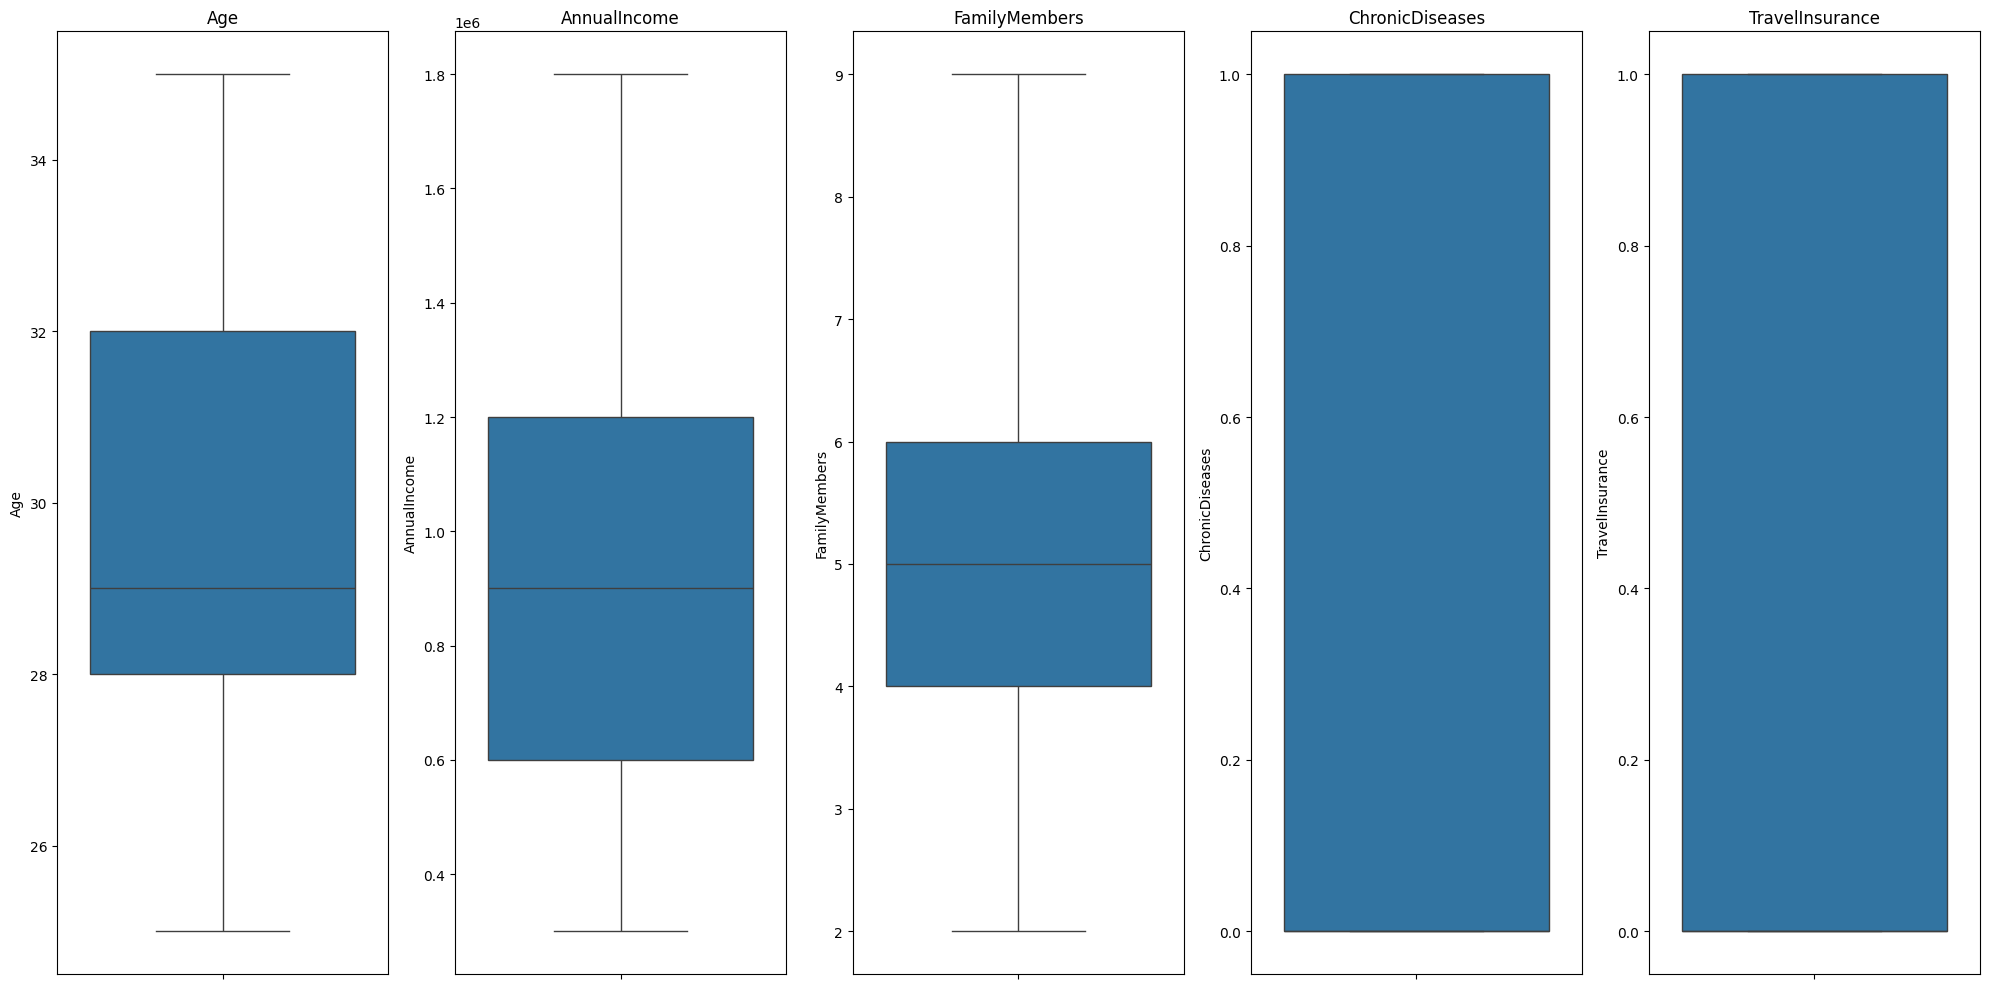

In [18]:
fig, ax = plt.subplots(1, len(numerical_col), figsize=(20,10))

for axes, col in enumerate(numerical_col):
  sns.boxplot(y=col, data=insurance, ax=ax[axes])
  ax[axes].set_title(col)

plt.tight_layout()
plt.show()

Berdasarkan boxplot diperoleh bahwa fitur-fitur numerik pada datasets "TraveInsurance" tidak terdapat outlier.

### Univariate Analysis

In [19]:
def currency_formatter(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x * 1e-6)
    elif x >= 1e3:
        return '{:1.0f}k'.format(x * 1e-3)
    else:
        return '{:1.0f}'.format(x)

formatter = FuncFormatter(currency_formatter)

Private Sector/Self Employed    876
Government Sector               373
Name: Employment Type, dtype: int64 



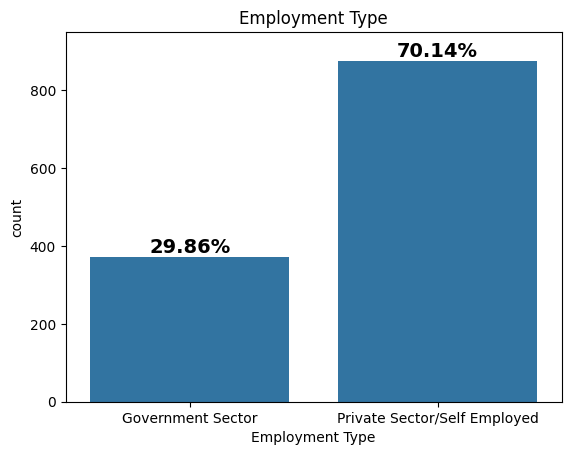

In [20]:
print(insurance[categorical_col[0]].value_counts(), '\n')

ax = sns.countplot(x=categorical_col[0], data=insurance)
ax.yaxis.set_major_formatter(formatter)
plt.title(categorical_col[0])
plt.ylim(0, 950)

t = float(len(insurance))
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2.,
            y=height + 10,
            s='{:.2f}%'.format((height / t) * 100),
            fontdict={'fontsize':14, 'fontweight':'bold'},
            ha='center')

plt.show()

Terdapat dua kategori pada fitur Employment Type, yaitu Government Sector dan Private Sector/Self Employed. Dari persentase pada diagram batang di atas, dapat disimpulkan bahwa 70% pelanggan bekerja di sektor Swasta atau sebagai Wiraswasta.

Yes    1047
No      202
Name: GraduateOrNot, dtype: int64 



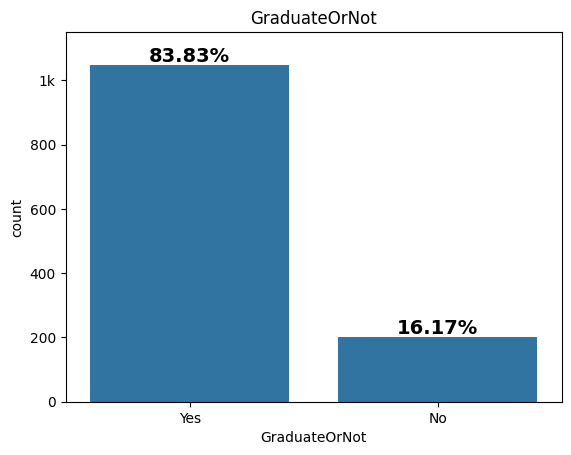

In [21]:
print(insurance[categorical_col[1]].value_counts(), '\n')

ax = sns.countplot(x=categorical_col[1], data=insurance)
ax.yaxis.set_major_formatter(formatter)
plt.title(categorical_col[1])
plt.ylim(0, 1150)

t = float(len(insurance))
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2.,
            y=height + 10,
            s='{:.2f}%'.format((height / t) * 100),
            fontdict={'fontsize':14, 'fontweight':'bold'},
            ha='center')

plt.show()

Sebagian besar pelanggan, lebih dari 80%, telah lulus kuliah. Hal ini menunjukkan bahwa mayoritas pelanggan memiliki tingkat pendidikan yang lebih tinggi, yang mungkin mengindikasikan kestabilan finansial dan potensi untuk membeli produk asuransi perjalanan.

No     954
Yes    295
Name: FrequentFlyer, dtype: int64 



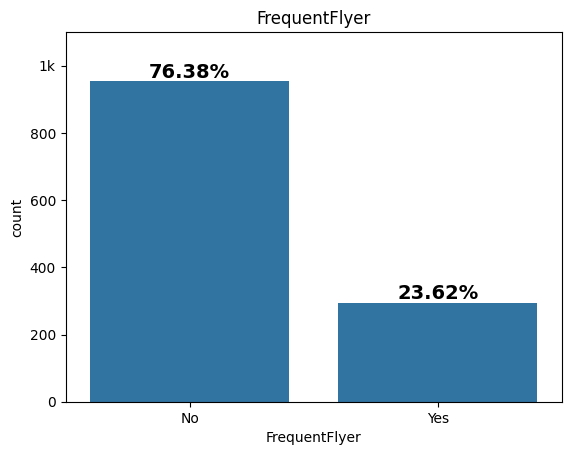

In [22]:
print(insurance[categorical_col[2]].value_counts(), '\n')

ax = sns.countplot(x=categorical_col[2], data=insurance)
ax.yaxis.set_major_formatter(formatter)
plt.title(categorical_col[2])
plt.ylim(0, 1100)

t = float(len(insurance))
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2.,
            y=height + 10,
            s='{:.2f}%'.format((height / t) * 100),
            fontdict={'fontsize':14, 'fontweight':'bold'},
            ha='center')

plt.show()

Mayoritas pelanggan, sekitar 70%, tidak memiliki status FrequentFlyer. Ini menunjukkan bahwa sebagian besar pelanggan tidak sering melakukan perjalanan dengan pesawat dalam dua tahun terakhir.

No     1005
Yes     244
Name: EverTravelledAbroad, dtype: int64 



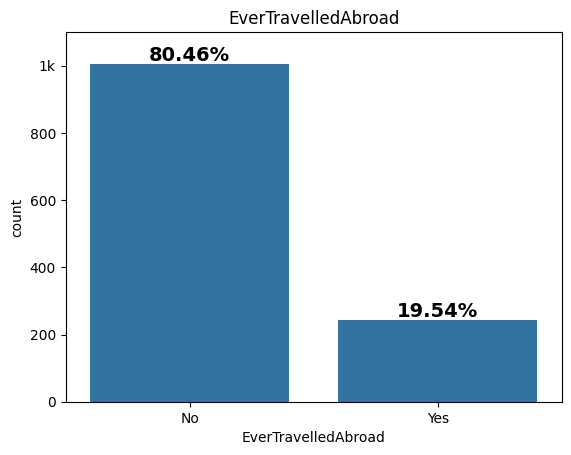

In [23]:
print(insurance[categorical_col[3]].value_counts(), '\n')

ax = sns.countplot(x=categorical_col[3], data=insurance)
ax.yaxis.set_major_formatter(formatter)
plt.title(categorical_col[3])
plt.ylim(0, 1100)

t = float(len(insurance))
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2.,
            y=height + 10,
            s='{:.2f}%'.format((height / t) * 100),
            fontdict={'fontsize':14, 'fontweight':'bold'},
            ha='center')

plt.show()

80% pelanggan tidak pernah melakukan perjalanan ke luar negeri. Hal ini menunjukkan bahwa mayoritas pelanggan memiliki pengalaman perjalanan yang terbatas di luar negeri, yang dapat memengaruhi minat mereka terhadap pembelian paket asuransi perjalanan.

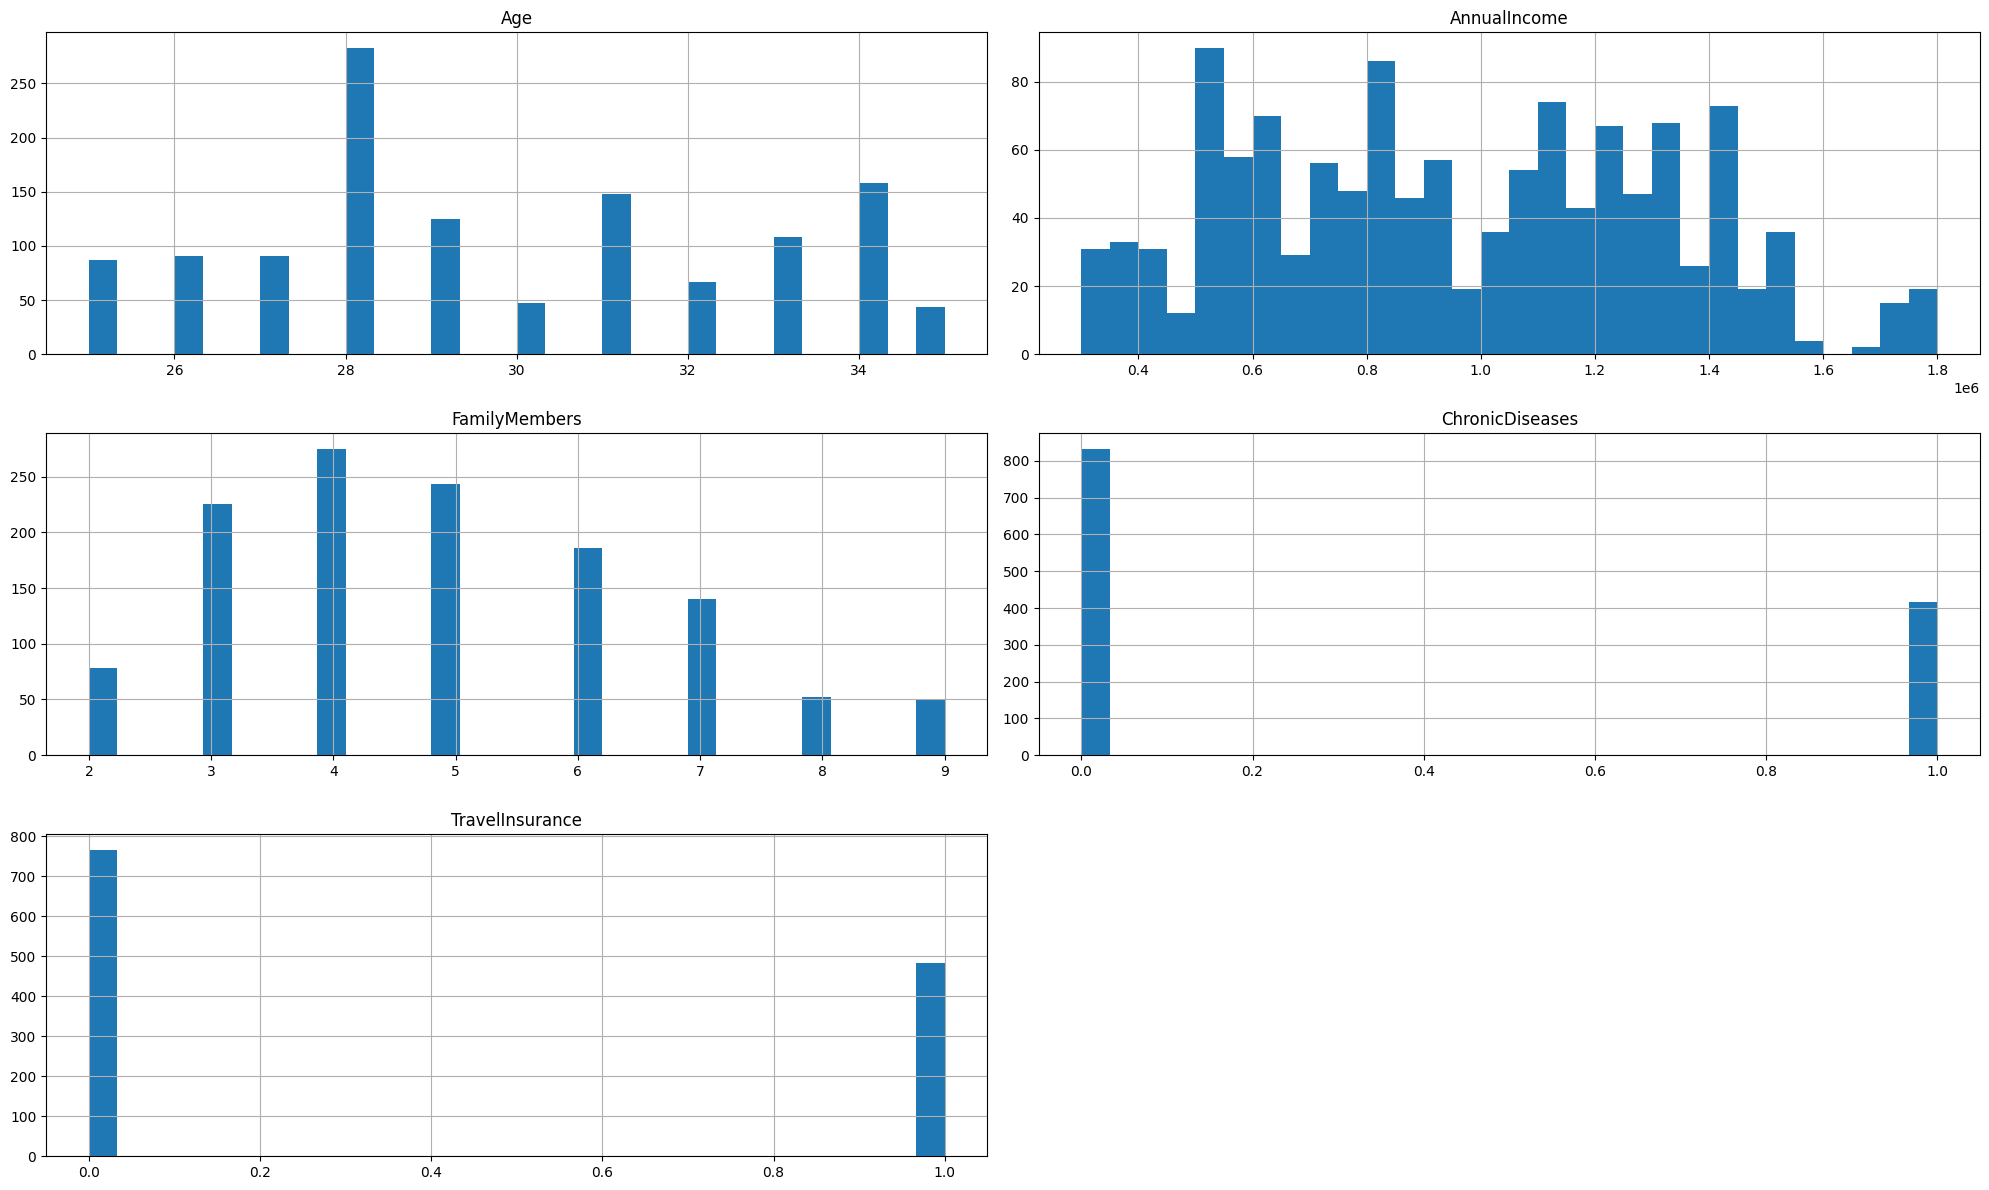

In [24]:
insurance.hist(bins=30, figsize=(20,12))
plt.tight_layout()
plt.show()

Berdasarkan histogram di atas, diperoleh beberapa informasi, antara lain:

- Mayoritas pelanggan berusia sekitar 28 tahun.
- Rentang pendapatan tahunan pelanggan berkisar antara 300.000 rupee hingga 1.800.000 rupee.
- Jumlah anggota keluarga pelanggan didominasi oleh pelanggan dengan jumlah anggota keluarga berkisar antara 3 hingga 5 orang.
- Sebagian besar pelanggan tidak menderita penyakit kronis.
- Terdapat ketimpangan pada label atau target fitur, yaitu TravelInsurance, dengan jumlah pelanggan yang membeli paket asuransi perjalanan lebih sedikit dibandingkan dengan pelanggan yang tidak membeli.

### Multivariate Analysis

In [69]:
def proportion_graph(df, col, hue):
  x = df.groupby(col)[hue].value_counts(normalize=True).unstack()

  x.plot(kind='bar', stacked=True)
  plt.title(f"Proportion of {hue} Purchases by {col}")
  plt.xlabel(col)
  plt.ylabel("Proportion")
  plt.xticks(rotation=0)
  plt.yticks(ticks=np.linspace(0,1,11))
  plt.legend(title=hue, loc=1)
  plt.tight_layout()
  plt.show()

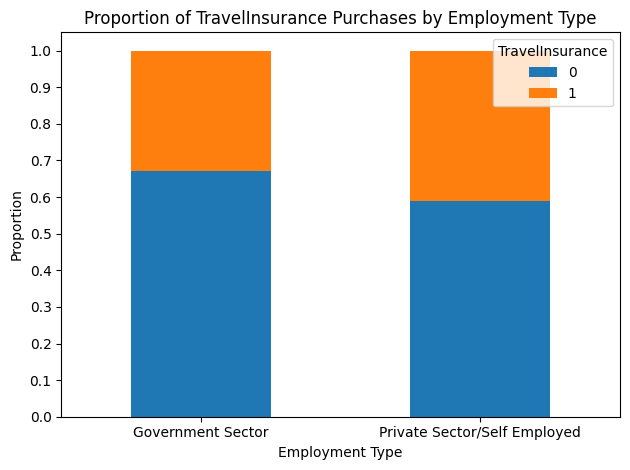

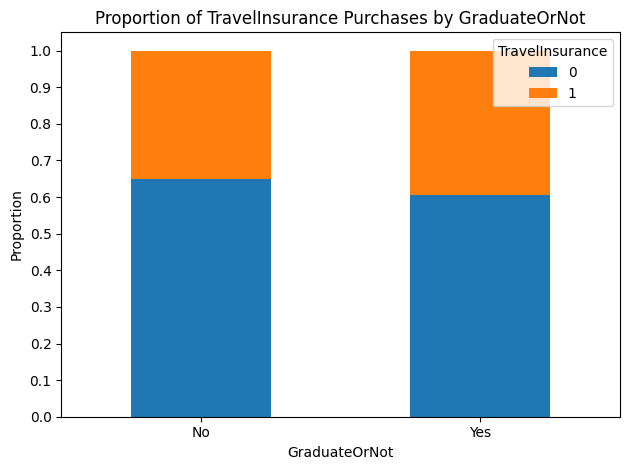

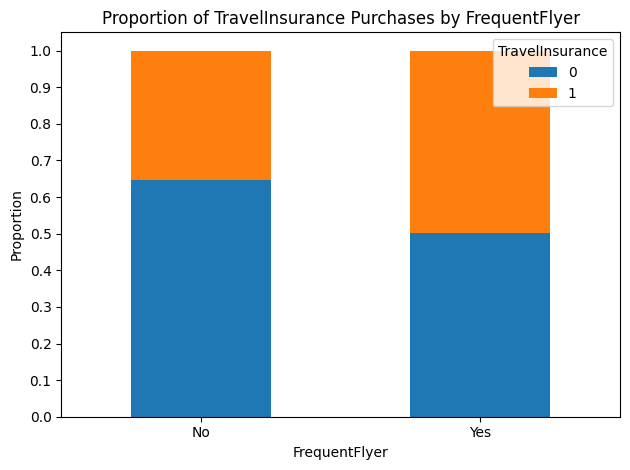

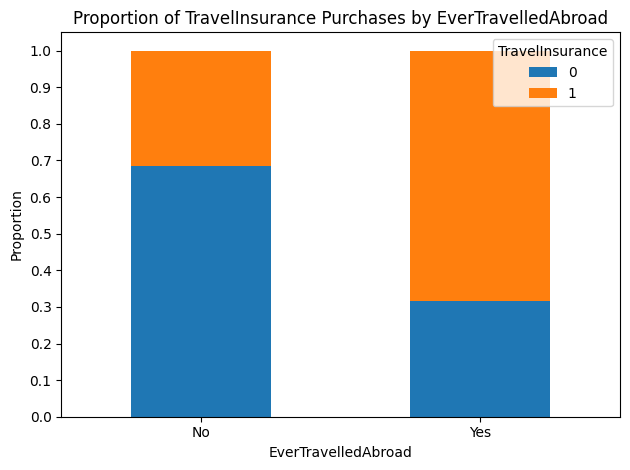

In [70]:
for col in categorical_col:
  proportion_graph(insurance, col, 'TravelInsurance')

Berdasarkan analisis visual, terlihat bahwa pelanggan yang pernah melakukan perjalanan ke luar negeri memiliki kemungkinan lebih tinggi untuk membeli paket asuransi perjalanan. Proporsi pelanggan yang membeli asuransi perjalanan lebih tinggi di antara mereka yang pernah bepergian ke luar negeri dibandingkan dengan mereka yang tidak. Hal ini menunjukkan adanya hubungan yang signifikan antara perjalanan ke luar negeri dan keputusan pembelian asuransi perjalanan. Selain itu, analisis juga menunjukkan bahwa tidak ada pengaruh yang signifikan dari fitur lain terhadap keputusan pembelian asuransi perjalanan.

<Figure size 800x600 with 0 Axes>

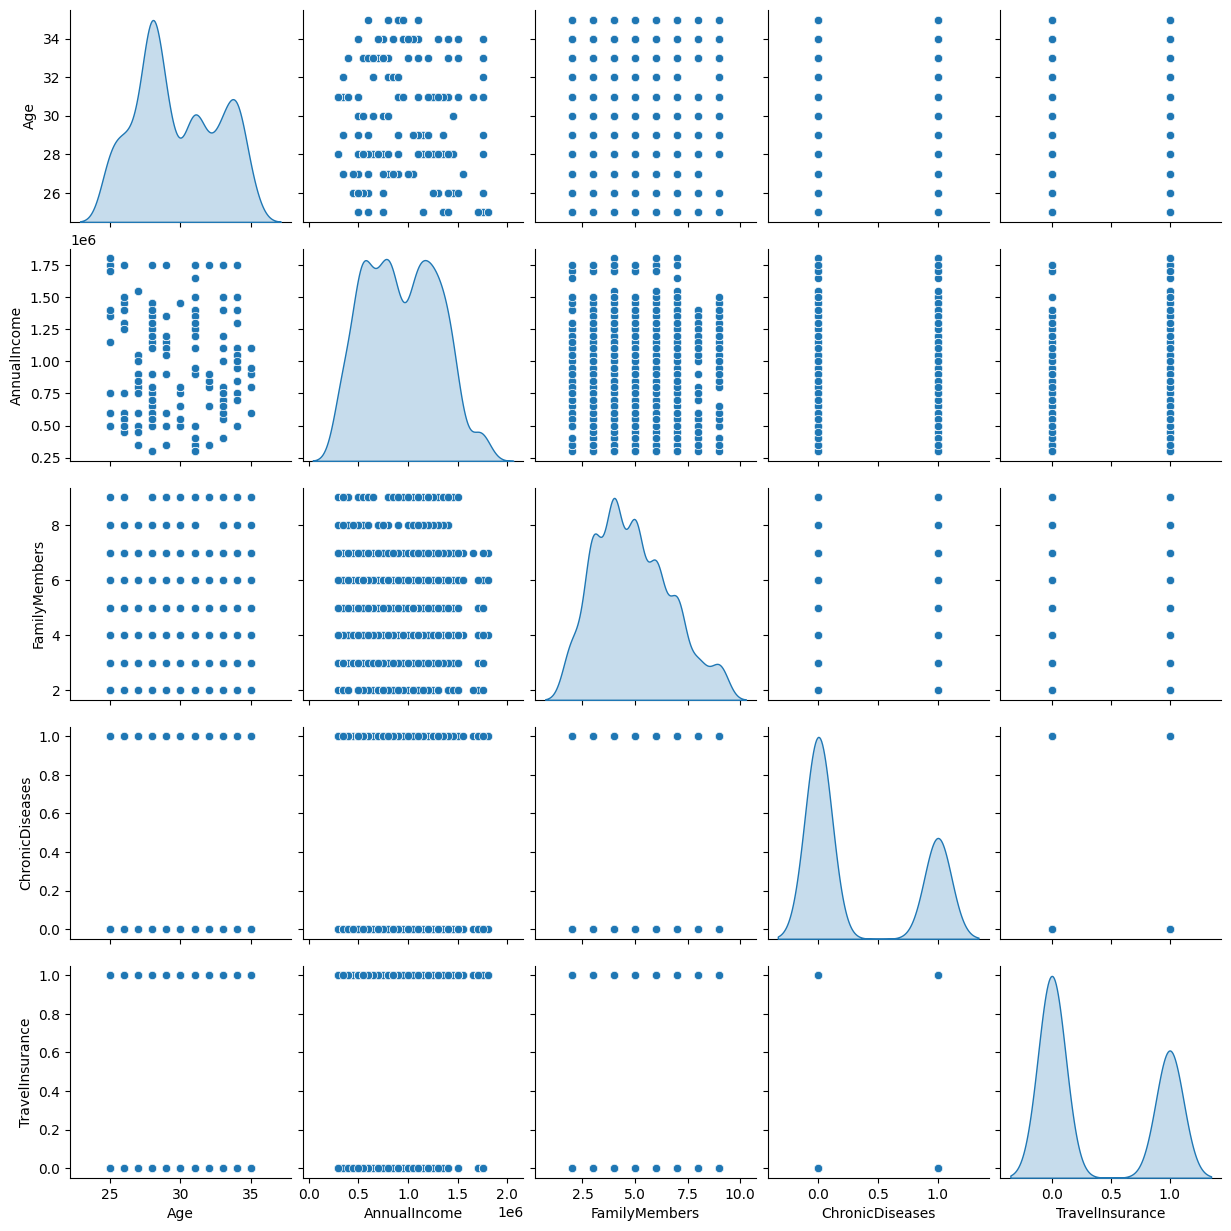

In [71]:
plt.figure(figsize=(8,6))
sns.pairplot(data=insurance, diag_kind='kde')

plt.show()

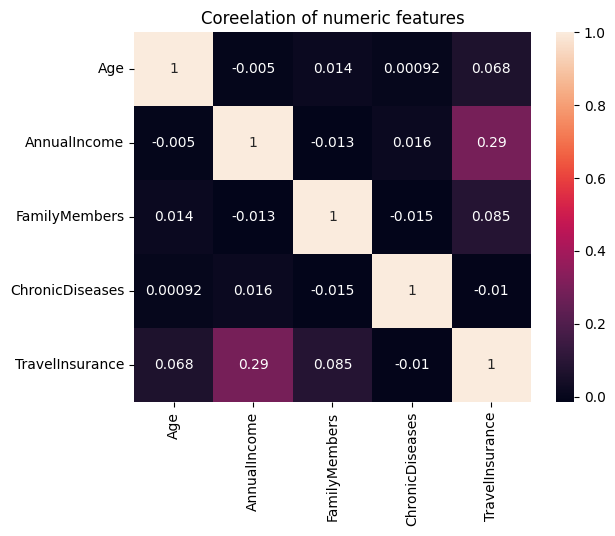

In [72]:
sns.heatmap(insurance.corr(numeric_only=True), annot=True)
plt.title("Coreelation of numeric features")

plt.show()

Dari matriks tersebut, dapat dilihat bahwa:

- Age: memiliki korelasi positif yang rendah dengan keputusan untuk membeli asuransi perjalanan (TravelInsurance).
- AnnualIncome: memiliki korelasi positif yang sedang dengan keputusan untuk membeli asuransi perjalanan.
- FamilyMembers: memiliki korelasi positif yang rendah dengan keputusan untuk membeli asuransi perjalanan.
- ChronicDiseases: memiliki korelasi negatif yang rendah dengan keputusan untuk membeli asuransi perjalanan.

## Data Preparation

### Encoding Fitur Categori

In [182]:
insurance[categorical_col]

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
0,Government Sector,Yes,No,No
1,Private Sector/Self Employed,Yes,No,No
2,Private Sector/Self Employed,Yes,No,No
3,Private Sector/Self Employed,Yes,No,No
4,Private Sector/Self Employed,Yes,Yes,No
...,...,...,...,...
1976,Government Sector,Yes,No,No
1981,Government Sector,Yes,No,No
1982,Private Sector/Self Employed,Yes,Yes,Yes
1983,Private Sector/Self Employed,Yes,No,Yes


Dari fitur-fitur kategori yang tersedia, rencananya akan dilakukan proses pengkodean kategori atau pemetaan (mapping) pada fitur Employment Type, GraduateOrNot, FrequentFlyer, dan EverTravelledAbroad. Pada fitur Employment Type, nilai "Government Sector" akan diubah menjadi 1 dan "Private Sector/Self Employed" akan diubah menjadi 0. Sedangkan pada fitur-fitur kategori lainnya, nilai "Yes" akan diubah menjadi 1 dan "No" akan diubah menjadi 0.

In [183]:
insurance_clean = insurance.copy()
insurance_clean['is_Goverment_Sector'] = insurance_clean[categorical_col[0]].map(lambda x: 1 if x=='Government Sector' else 0)
insurance_clean[categorical_col[1:]] = insurance_clean[categorical_col[1:]].applymap(
                                  lambda x: 1 if x == 'Yes' else 0)
insurance_clean.drop('Employment Type', axis=1, inplace=True)

insurance_clean

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,is_Goverment_Sector
0,31,1,400000,6,1,0,0,0,1
1,31,1,1250000,7,0,0,0,0,0
2,34,1,500000,4,1,0,0,1,0
3,28,1,700000,3,1,0,0,0,0
4,28,1,700000,8,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1976,32,1,900000,6,0,0,0,0,1
1981,27,1,850000,3,0,0,0,1,1
1982,33,1,1500000,4,0,1,1,1,0
1983,28,1,1750000,5,1,0,1,0,0


Setelah melakukan mapping. Langkah-langkah ini membantu dalam mengubah data kategorikal menjadi format yang dapat dimengerti oleh algoritma pembelajaran mesin, sehingga memungkinkan untuk membangun model prediksi dengan akurasi yang lebih baik.

### Train Test Split

In [184]:
X = insurance_clean.drop('TravelInsurance', axis=1)
y = insurance_clean['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [185]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1249
Total # of sample in train dataset: 999
Total # of sample in test dataset: 250


### Handling Imbalanced Data

In [186]:
y_train.value_counts()

0    616
1    383
Name: TravelInsurance, dtype: int64

Diketahui bahwa pada fitur target terdapat ketidakseimbangan dalam dataset, yaitu antara pelanggan yang membeli paket asuransi perjalanan dan pelanggan yang tidak membeli. Berdasarkan data, jumlah pelanggan yang membeli paket asuransi perjalanan lebih sedikit, sehingga termasuk dalam kategori minority class. Oleh karena itu, perlu dilakukan oversampling dengan menambahkan data sintetis untuk minority class atau melakukan undersampling dengan mengurangi data majority class agar data menjadi seimbang.

In [187]:
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
print(y_train_sm.value_counts())

0    616
1    616
Name: TravelInsurance, dtype: int64


Pada kasus ini, dilakukan oversampling menggunakan metode SMOTE (Synthetic Minority Oversampling TEchnique). Metode ini bekerja dengan cara memilih sampel yang dekat dengan ruang fitur, menggambar garis di antara sampel dalam ruang fitur, dan menggambar sampel baru pada titik di sepanjang garis tersebut. SMOTE membantu dalam menciptakan data sintetis untuk minority class sehingga mengimbangi jumlah sampel antara kelas mayoritas dan kelas minoritas dalam dataset.

### Standarisasi

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi. StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

Untuk menghindari kebocoran informasi pada data uji, kita hanya akan menerapkan fitur standarisasi pada data latih. Kemudian, pada tahap evaluasi, kita akan melakukan standarisasi pada data uji. Untuk lebih jelasnya, mari kita terapkan StandardScaler pada data.

In [188]:
numerical_features = ['Age', 'FamilyMembers', 'AnnualIncome']
scaler = StandardScaler()
scaler.fit(X_train_sm[numerical_features])
X_train_sm[numerical_features] = scaler.transform(X_train_sm.loc[:, numerical_features])
X_train_sm[numerical_features].head()

,Age,FamilyMembers,AnnualIncome
0,-0.601865,-1.074318,0.950232
1,-0.601865,0.646826,-1.828062
2,1.112184,0.646826,-1.550233
3,-0.944674,0.646826,0.116743
4,0.083755,-1.648032,-1.133489


In [189]:
X_train_sm[numerical_features].describe().round(4)

,Age,FamilyMembers,AnnualIncome
count,1232.0000,1232.0000,1232.0000
mean,0.0000,-0.0000,-0.0000
std,1.0004,1.0004,1.0004
min,-1.6303,-1.6480,-1.8281
25%,-0.6019,-0.6440,-0.8557
50%,-0.2591,0.0731,-0.0222
75%,0.7694,0.6468,0.8113
max,1.7978,2.3680,2.3394


 Perhatikan tabel di atas, sekarang nilai mean = 0 dan standar deviasi = 1.

## Model Development

Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita gunakan, antara lain:

- Logistic Regression (Base Model)
- Random Forest
- GradientBoostingClassifier
- AdaBoostClassifier

In [233]:
def evaluate_train(model, X_train, y_train):
  model_name = type(model).__name__
  df = pd.DataFrame()
  model.fit(X_train, y_train)

  scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
  cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)

  # evaluation training
  df.loc[model_name, 'accuracy'] = cv_results['test_accuracy'].mean()
  df.loc[model_name, 'precision'] = cv_results['test_precision'].mean()
  df.loc[model_name, 'recall'] = cv_results['test_recall'].mean()
  df.loc[model_name, 'f1_score'] = cv_results['test_f1'].mean()
  df.loc[model_name, 'roc_auc_score'] = cv_results['test_roc_auc'].mean()

  return df

def evaluate_test(model, X_test, y_test):
  model_name = type(model).__name__
  df = pd.DataFrame()
  y_pred = model.predict(X_test)

  # evaluation training
  df.loc[model_name, 'accuracy'] = accuracy_score(y_test, y_pred)
  df.loc[model_name, 'precision'] = precision_score(y_test, y_pred)
  df.loc[model_name, 'recall'] = recall_score(y_test, y_pred)
  df.loc[model_name, 'f1_score'] = f1_score(y_test, y_pred)
  df.loc[model_name, 'roc_auc_score'] = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

  return df

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

### Logistic Regression

Logistic Regression adalah model klasifikasi yang digunakan dalam machine learning untuk memprediksi probabilitas keanggotaan dari suatu kategori atau kelas. Model ini berbeda dari regresi linear yang digunakan untuk memprediksi nilai numerik kontinu, karena Logistic Regression digunakan untuk memprediksi probabilitas bahwa variabel dependen bersifat biner (kategorikal).

In [234]:
logreg = LogisticRegression()
df_lr = evaluate_train(logreg, X_train_sm, y_train_sm)

### Random Forest

RandomForestClassifier adalah algoritma ensemble yang kuat untuk masalah klasifikasi. Algoritma ini menggabungkan konsep dari beberapa pohon keputusan (decision trees) yang dibangun secara acak selama proses pelatihan. Setiap pohon keputusan dibangun berdasarkan subset acak dari fitur-fitur dan sampel-sampel data, sehingga menciptakan berbagai variasi model. Selanjutnya, hasil prediksi dari setiap pohon diambil dan dihitung untuk menentukan prediksi kelas mayoritas (mode) sebagai hasil dari model Random Forest. Keunggulan dari RandomForestClassifier adalah kemampuannya untuk mengatasi overfitting yang biasa terjadi pada pohon keputusan tunggal dengan mengambil rata-rata atau mayoritas dari prediksi beberapa pohon. Selain itu, Random Forest juga memiliki kemampuan untuk menangani dataset dengan fitur-fitur yang tidak terstruktur atau berukuran besar dengan baik. Namun, seperti kebanyakan model, RandomForestClassifier juga memerlukan penyetelan parameter yang tepat untuk mencapai kinerja terbaik.

In [235]:
rfc = RandomForestClassifier()
df_rfc = evaluate_train(rfc, X_train_sm, y_train_sm)

### Boosting Algorithm (GradientBoosting)

GradientBoostingClassifier adalah algoritma ensemble yang digunakan untuk masalah klasifikasi dan regresi. Algoritma ini bekerja dengan cara membangun serangkaian model prediktif sederhana, yang dikenal sebagai pohon keputusan, secara berurutan. Setiap model berikutnya berfokus pada memperbaiki kesalahan prediksi model sebelumnya dalam urutan yang ditentukan sebelumnya. GradientBoostingClassifier mengoptimalkan fungsi kerugian (loss function) dengan menggunakan gradien descent, sehingga mengarah ke peningkatan kinerja model secara bertahap. Keunggulan utama GradientBoostingClassifier adalah kemampuannya untuk menangani dataset yang kompleks dan tidak linier dengan baik, serta memiliki toleransi terhadap overfitting. Namun, algoritma ini dapat memerlukan waktu komputasi yang lebih lama dan perlu penyetelan parameter yang cermat untuk menghindari overfitting.

In [236]:
gbc = GradientBoostingClassifier()
df_gbc = evaluate_train(gbc, X_train_sm, y_train_sm)

### Boosting Algorithm (AdaBoost)

AdaboostClassifier, singkatan dari Adaptive Boosting Classifier, adalah algoritma ensemble yang digunakan untuk masalah klasifikasi. Algoritma ini bekerja dengan cara membangun serangkaian model lemah (biasanya pohon keputusan dangkal) secara berurutan. Setiap model lemah berfokus pada contoh data yang sebelumnya salah diklasifikasikan oleh model sebelumnya. Selama iterasi, bobot sampel diubah, memberikan penekanan lebih pada sampel yang sebelumnya salah diklasifikasikan. Dengan cara ini, setiap model lemah "belajar" untuk mengkompensasi kesalahan model sebelumnya. Pada tahap akhir, hasil prediksi dari semua model lemah dijumlahkan, dan kelas target dipilih berdasarkan bobot akhir dari masing-masing model lemah. AdaboostClassifier memiliki kemampuan untuk menangani dataset yang kompleks dengan baik dan dapat memberikan kinerja yang baik meskipun dengan model lemah yang sederhana. Salah satu keunggulan utamanya adalah kemampuannya untuk menghindari overfitting, karena fokus pada sampel yang sebelumnya salah diklasifikasikan.

In [237]:
ada = AdaBoostClassifier()
df_ada = evaluate_train(ada, X_train_sm, y_train_sm)

## Evaluation Model


Matriks evaluasi yang digunakan meliputi accuracy, recall, precision, f1_score, dan roc_auc_score. Di antara semua metrik tersebut, roc_auc_score dipilih sebagai matriks evaluasi utama karena kemampuannya untuk mengukur false positif dan false negatif, yang sangat penting dalam kasus klasifikasi yang tidak seimbang. Dengan memperhatikan matriks evaluasi ini, model klasifikasi terbaik dapat dipilih berdasarkan kinerjanya dalam memisahkan kelas positif dan negatif.

In [238]:
df_eval_train = pd.concat([df_lr, df_rfc, df_gbc, df_ada], axis=0)
df_eval_train

,accuracy,precision,recall,f1_score,roc_auc_score
LogisticRegression,0.626638,0.645515,0.566483,0.602638,0.672240
RandomForestClassifier,0.657480,0.652847,0.665631,0.657182,0.718880
GradientBoostingClassifier,0.690741,0.729115,0.610307,0.663653,0.773361
AdaBoostClassifier,0.659057,0.705600,0.546958,0.615250,0.714262


Berdasarkan matriks evaluasi pada data train, diperoleh bahwa model GradientBoostingClassifier merupakan model terbaik dibanding model lainnya dengan ROC AUC 77%. Selanjutnya, akan dilakukan evaluasi pada data test, perlu dilakukan proses scaling terhadap data test. Hal ini harus dilakukan agar skala antara data train dan data test sama dan kita bisa melakukan evaluasi.

In [198]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [239]:
df_lr_test = evaluate_test(logreg, X_test, y_test)
df_rfc_test = evaluate_test(rfc, X_test, y_test)
df_gbc_test = evaluate_test(gbc, X_test, y_test)
df_ada_test = evaluate_test(ada, X_test, y_test)

df_eval_test = pd.concat([df_lr_test, df_rfc_test, df_gbc_test, df_ada_test], axis=0)
df_eval_test

,accuracy,precision,recall,f1_score,roc_auc_score
LogisticRegression,0.612,0.515152,0.51,0.512563,0.663267
RandomForestClassifier,0.596,0.495238,0.52,0.507317,0.603933
GradientBoostingClassifier,0.700,0.634409,0.59,0.611399,0.753700
AdaBoostClassifier,0.680,0.611111,0.55,0.578947,0.717000


Hasil yang sama diperoleh, bahwa model GradientBoostingClassifier merupakan model terbaik dibanding model lainnya. Berikut perbandingan antar model untuk matriks ROC AUC pada setiap model.

In [242]:
df_eval_roc = pd.concat([df_eval_train['roc_auc_score'], df_eval_test['roc_auc_score']], axis=1)
df_eval_roc.columns = ['ROC AUC - Train', 'ROC AUC - Test']
df_eval_roc

,ROC AUC - Train,ROC AUC - Test
LogisticRegression,0.672240,0.663267
RandomForestClassifier,0.718880,0.603933
GradientBoostingClassifier,0.773361,0.753700
AdaBoostClassifier,0.714262,0.717000


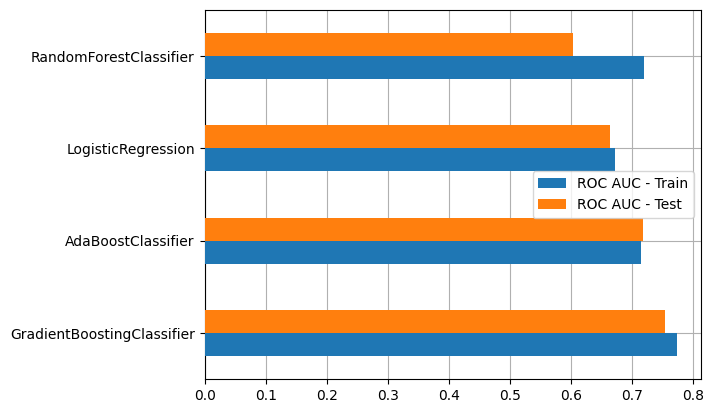

In [243]:
fig, ax = plt.subplots()
df_eval_roc.sort_values(by='ROC AUC - Test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Berdasarkan perbandingan nilai ROC AUC, model GradientBoostingClassifier menunjukkan kinerja yang baik dengan nilai 75% pada data test. Ini menunjukkan bahwa model tersebut memiliki kemampuan yang cukup baik dalam membedakan antara kelas positif dan negatif. Oleh karena itu, berdasarkan metrik evaluasi ini, dapat disimpulkan bahwa GradientBoostingClassifier adalah model terbaik di antara model lain yang dievaluasi.

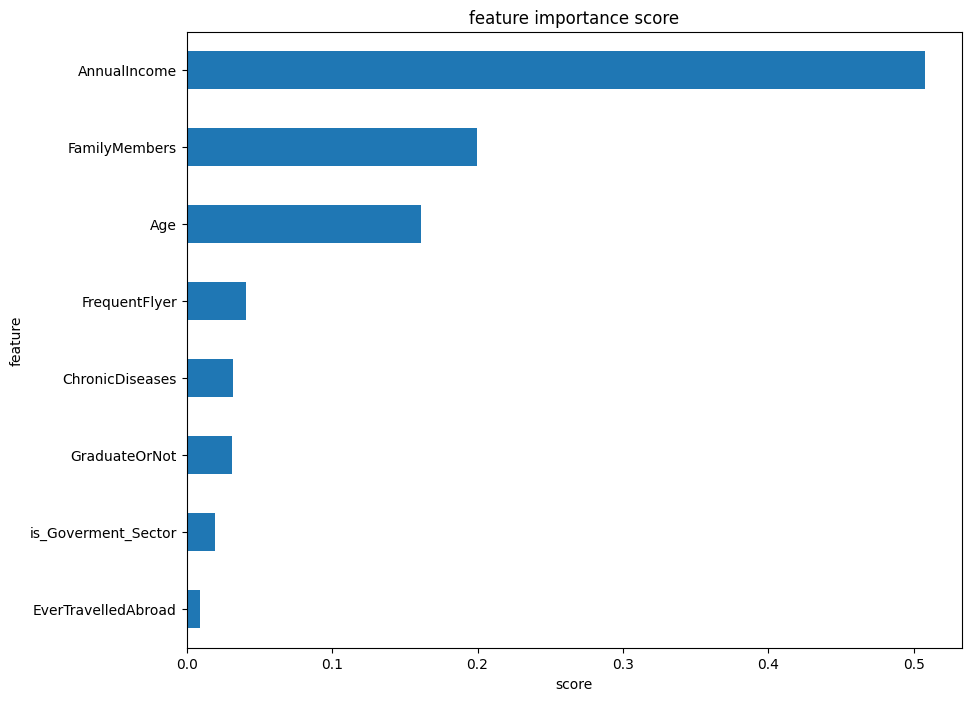

In [244]:
show_feature_importance(gbc)

Dari hasil fitur penting yang diperoleh dari model, ditemukan bahwa AnnualIncome, FamilyMembers, dan Age adalah fitur-fitur yang memiliki kontribusi signifikan dalam memprediksi apakah seorang pelanggan akan membeli paket asuransi perjalanan. Oleh karena itu, fitur-fitur ini dianggap sebagai faktor penting dalam keputusan pembelian pelanggan.